# Simulation of Stochastic Differential Equations (SDEs)

This notebook simulates the trajectories of players interacting through a stochastic differential equation (SDE) using the Euler-Maruyama method. The simulation includes the following parameters:

- **N**: Number of players
- **a**: Positive constant representing the interaction strength
- **sigma**: Volatility of the system
- **T**: Total simulation time
- **dt**: Time step for the simulation
- **steps**: Number of time steps, calculated as `T / dt`

## Steps in the Simulation:
1. **Initialization**: 
    - The initial state `X[0, :]` is set to zero for all players.
2. **Euler-Maruyama Method**:
    - For each time step, the interaction term and Brownian increment are calculated.
    - The state of each player is updated based on the interaction term and stochastic noise.
3. **Visualization**:
    - The trajectories of all players are plotted over time.
    - The mean trajectory is highlighted in red.
    - A reference line `D = -0.7` is added for comparison.

## Output:
The plot shows:
- Individual trajectories of players in grey.
- The mean trajectory in red.
- A dashed black line representing `D = -0.7`.

This simulation provides insights into the dynamics of interacting players under stochastic influences.

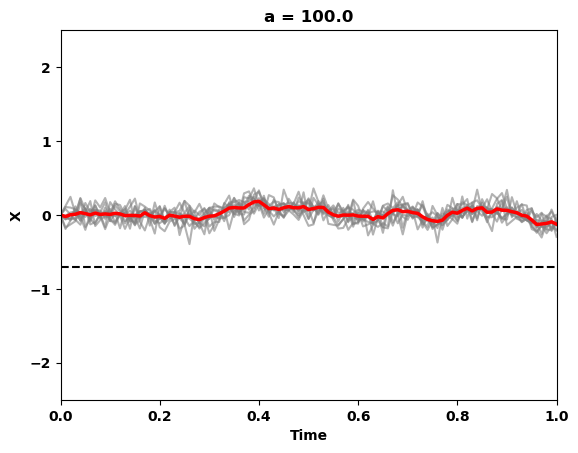

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of players
a = 100.0  # Positive constant
sigma = 1.0  # Volatility
T = 1.0  # Total time
dt = 0.01  # Time step
steps = int(T / dt)  # Number of time steps

# Initialize X for all players
X = np.zeros((steps + 1, N))
X[0, :] = np.zeros(N)  # Initial condition (random values)

# Simulate the SDE using Euler-Maruyama method
for t in range(steps):
    for i in range(N):
        interaction_term = (a / N) * np.sum(X[t, :] - X[t, i])
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian increment
        X[t + 1, i] = X[t, i] + interaction_term * dt + sigma * dW

# Plot the trajectories of all players
time = np.linspace(0, T, steps + 1)
for i in range(N):
    plt.plot(time, X[:, i],alpha=0.6,color= "grey", label=f"Player {i+1}")

D = -0.7
X_mean = np.mean(X, axis=1)
plt.plot(time, X_mean, 'r-', linewidth=2.5,label="Mean")
plt.plot(time, D * np.ones(steps + 1), 'k--',label="D = -0.7")

plt.xlim(0, T)
plt.ylim(-2.5, 2.5)
plt.xlabel("Time")
plt.ylabel("X")
plt.title(f'a = {a}')
#plt.suptitle(f'a={a}, sigma={sigma}, N={N}')
#plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.show()